In [1]:
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_moons
#生成数据样本

In [3]:
X,Y = make_moons(n_samples=300,noise=0.2)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

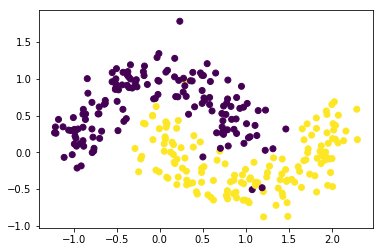

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [7]:
X = X.T
Y = Y.T

In [8]:
X.shape

(2, 300)

In [9]:
Y = Y.reshape((1,300))

In [10]:
Y.shape

(1, 300)

In [11]:
from sklearn.linear_model import LogisticRegressionCV

In [12]:
clf = LogisticRegressionCV()

In [13]:
clf.fit(X.T,Y.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
clf

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [40]:
def plot_decision_boundary(model,X,y):
    x_min,x_max = X[0,:].min()-1,X[0,:].max()+1 #x轴的边界
    y_min,y_max = X[1,:].min()-1,X[1,:].max()+1 #y轴的边界
    h = 0.01
    # generate a grid of points with distance h between them
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))#meshgrid将arange转化为array数组
    # predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    ''' 
    np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
       
        x = np.array([[1, 2], [3, 4]])
         x.ravel()
array([1, 2, 3, 4])
       '''
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:],X[1,:],c=y)

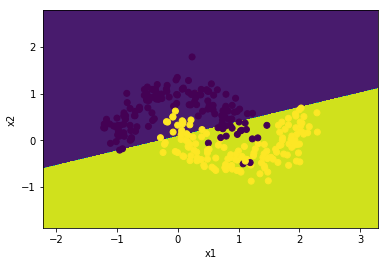

In [41]:
plot_decidion_boundary(clf,X,Y)

In [33]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [35]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    #assert() 断言语句 用来测试表达式，其返回值为假，就会触发异常
    parameters = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return parameters

In [19]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

In [20]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {'Z1':Z1,
            'A1':A1,
            'Z2':Z2,
            'A2':A2}
    
    return A2,cache

In [37]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs)/m
    cost = np.squeeze(cost) # turns[[17]] into 17
    
    assert(isinstance(cost,float))
    
    return cost

In [22]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims= True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads = {'dW1':dW1,
             'db1':db1,
             'dW2':dW2,
             'db2':db2}
    
    return grads

In [23]:
def update_parameters(parameters,grads,learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {'W1':W1,
                  'b1':b1,
                  'W2':W2,
                  'b2':b2}
    
    return parameters

In [24]:
def nn_model(X,Y,n_h,num_iterations = 10000,print_cost= False):
    np.random.seed(3)
    
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0,num_iterations):
        A2,cache = forward_propagation(X,parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads)
        
        if print_cost and i%1000 == 0:
            print('Cost after iteration %i: %f'%(i,cost))
            
    return parameters

In [25]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [38]:
parameters = nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)

Cost after iteration 0: 0.692994
Cost after iteration 1000: 0.298589
Cost after iteration 2000: 0.298301
Cost after iteration 3000: 0.096259
Cost after iteration 4000: 0.078632
Cost after iteration 5000: 0.073204
Cost after iteration 6000: 0.070479
Cost after iteration 7000: 0.068802
Cost after iteration 8000: 0.067666
Cost after iteration 9000: 0.066838


In [43]:
predict(parameters,X)

array([[False, False, False, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
        False,  True,  True,  True, False,  True, False, False,  True,
         True, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True, False, False,
        False,  True,  True, False, False, False,  True, False, False,
        False,  True,  True, False,  True,  True,  True, False,  True,
        False,  True, False, False, False, False, False, False,  True,
        False,  True, False,  True, False, False,  True,  True, False,
        False,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False, False,  True, False,
        False, False,  True, False, False,  True,  True,  True,  True,
        False, False, False,  True,  True, False, False,  True, False,
        False, False, False, False,  True,  True, False,  True,  True,
      

In [50]:
def plot_decision_boundary2(parameters,X,Y):
    x_min,x_max = X[0,:].min()-1,X[0,:].max()+1 #x轴的边界
    y_min,y_max = X[1,:].min()-1,X[1,:].max()+1 #y轴的边界
    h = 0.01
    # generate a grid of points with distance h between them
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))#meshgrid将arange转化为array数组
    # predict the function value for the whole grid
    Z = predict(parameters,(np.c_[xx.ravel(),yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:],X[1,:],c=Y)

Accuracy for1 hidden units:86.66666666666667 %
Accuracy for2 hidden units:87.33333333333333 %
Accuracy for3 hidden units:98.0 %
Accuracy for4 hidden units:98.33333333333333 %
Accuracy for5 hidden units:98.33333333333333 %
Accuracy for10 hidden units:98.33333333333333 %
Accuracy for20 hidden units:86.0 %


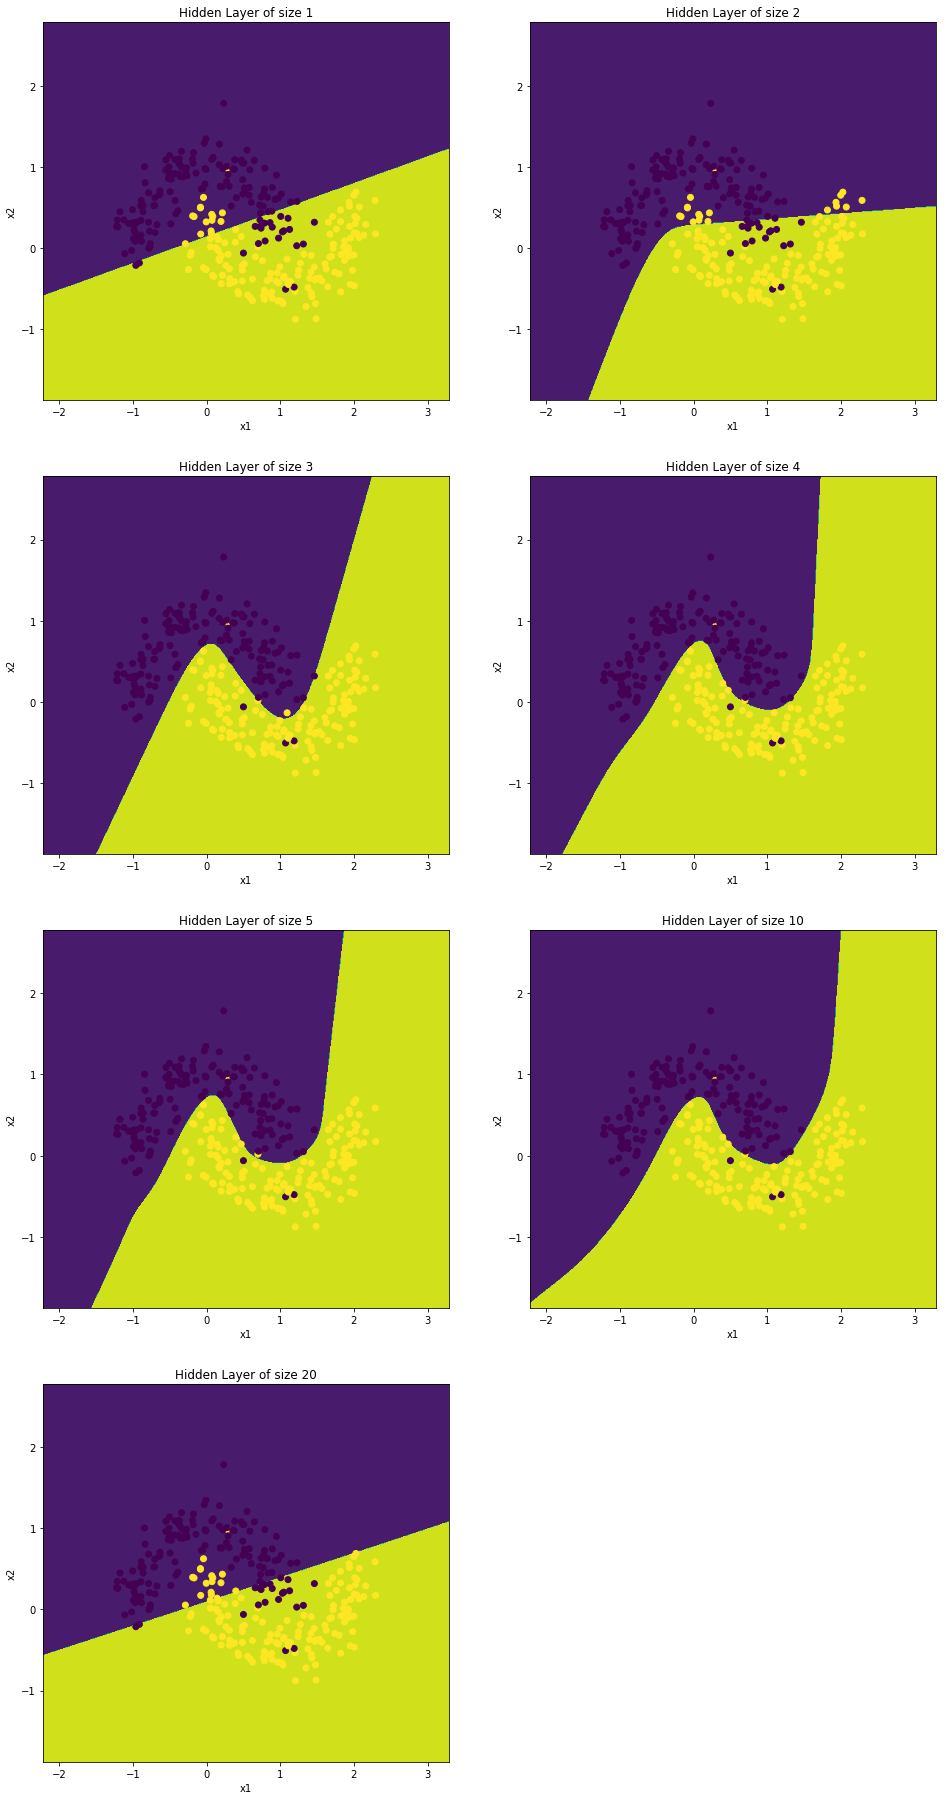

In [52]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,10,20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(4,2,i+1)
    plt.title('Hidden Layer of size %d'%n_h)
    parameters = nn_model(X,Y,n_h,num_iterations=5000)
    plot_decision_boundary2(parameters,X,Y)
    predictions = predict(parameters,X)
    accuracy = float((np.dot(Y,predictions.T)+np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print('Accuracy for{} hidden units:{} %'.format(n_h,accuracy))